# Fashion MNIST clustering

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import rand_score

from tensorflow.keras.datasets import fashion_mnist

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

### Notebook Objectives:

* short EDA (show data and label)
* elbow plot
* cluster sklearn kmeans 
* error analysis by showing pictures of clusters
* How do you figure out if clustering worked, if you don't have pictures that are easy to inspect?

Elbow with yellowbrick: dashed line is point of maximum curvature


In [7]:
# class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))


Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


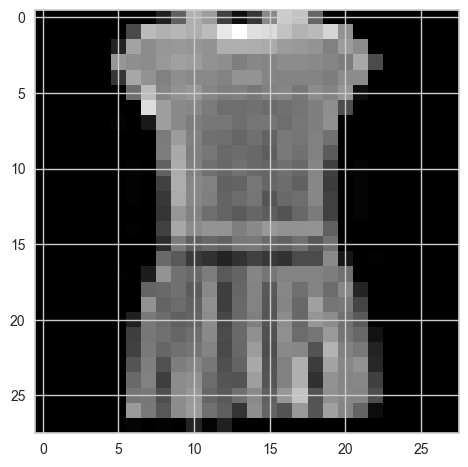

In [16]:
# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

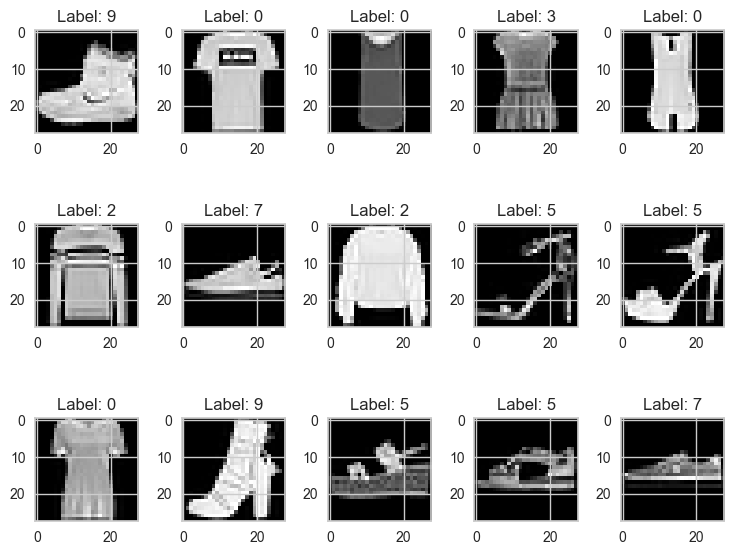

In [17]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [18]:
X_train_flat = X_train.reshape(60000,-1)
X_test_flat = X_test.reshape(10000, -1)

In [19]:
kmeans = KMeans(10,  n_init="auto")
kmeans.fit(X_train_flat)

KMeans(n_clusters=10, n_init='auto')

In [24]:
y_pred_train = kmeans.predict(X_train_flat)
y_pred_test = kmeans.predict(X_test_flat)

In [26]:
print(rand_score(Y_train, y_pred_train))
print(rand_score(Y_test, y_pred_test))

0.8721248615254699
0.8708411641164117


/Users/mia/Desktop/clustering_meetup/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mia/Desktop/clustering_meetup/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mia/Desktop/clustering_meetup/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mia/Desktop/clustering_meetup/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

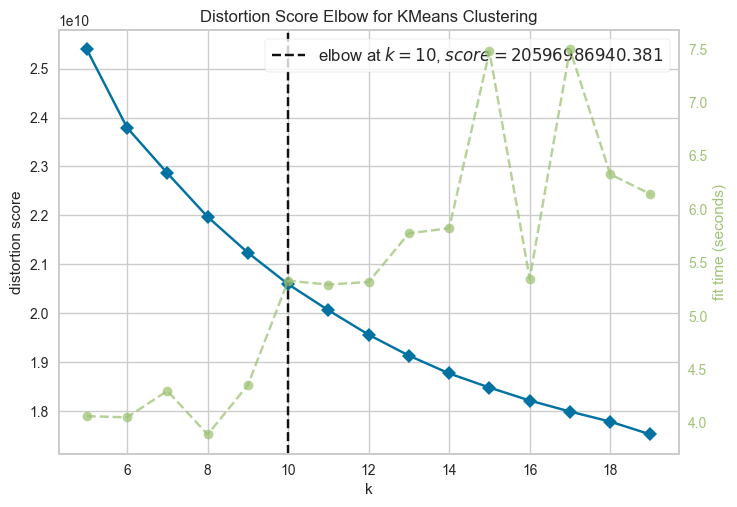

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Elbow plot with Yellowbrick
model_yb = KMeans()
visualizer = KElbowVisualizer(model_yb, k=(5,20))
visualizer.fit(X_test_flat)        # Fit the data to the visualizer
visualizer.show()

In [31]:
kmeans = KMeans(10,  n_init="auto")
kmeans.fit(X_train_flat)

KMeans(n_clusters=10, n_init='auto')

In [33]:
kmeans = KMeans(10,  n_init="auto")
kmeans.fit(X_train_flat)

KMeans(n_clusters=10, n_init='auto')

In [36]:
kmeans.inertia_

124661771618.80493

In [ ]:
centroid = kmeans.cluster_centers_[5].reshape(28,28)

In [ ]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = kmeans.cluster_centers_
#labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(kmeans.cluster_centers_[i].reshape(28,28), cmap='gray')

In [ ]:
y_pred = kmeans.predict(X_train.reshape(60000,-1))

In [ ]:
y_pred[20:40]

In [ ]:
plt.imshow(X_train[23], cmap="Greys");

In [ ]:
Y_train[23]

In [ ]:
num_row = 2
num_col = 5
class_label = 3

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i, pic in enumerate(np.where(y_pred == class_label)[0][:10]):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[pic].reshape(28,28), cmap='gray')

In [ ]:
plt.imshow(kmeans.cluster_centers_[class_label].reshape(28,28), cmap="Greys")

In [ ]:
model_s = KMeans(7, random_state=42)
visualizer_s = SilhouetteVisualizer(model_s, colors='yellowbrick')
visualizer_s.fit(X_train.reshape(60000,-1))        # Fit the data to the visualizer
visualizer_s.show()

In [ ]:
model_s = KMeans(10, random_state=42)
visualizer_s = SilhouetteVisualizer(model_s, colors='yellowbrick')
visualizer_s.fit(X_train.reshape(60000,-1))        # Fit the data to the visualizer
visualizer_s.show()

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1200, min_samples=100)

dbscan.fit(X_train.reshape(60000, -1))

In [ ]:
sum(dbscan.labels_)

In [ ]:
pd.Series(dbscan.labels_).value_counts()

In [ ]:
# Initialize and fit NearestNeighbors object
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fitted = neighbors.fit(X_train.reshape(60000, -1))

# Get distance and indices of pairs of points
distances, indices = neighbors_fitted.kneighbors(X_train.reshape(60000, -1))

# Sort distances 
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot distances to determine suitable value for epsilon
plt.plot(distances)
plt.hlines(0.025, 0, 2130, linestyles='--', color='black',linewidth=2)
plt.ylabel("Distance", size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Find suitable value for epsilon", size=26)
plt.text(1900, 0.03,"~ 0.025", size=22);

In [ ]:
plt.plot(distances)
#plt.hlines(0.025, 0, 2130, linestyles='--', color='black',linewidth=2)
plt.ylabel("Distance", size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Find suitable value for epsilon", size=26)
plt.text(1900, 0.03,"~ 0.025", size=22);